<center><img src="img/dsa-logo.JPG" width="400"/>

***

<center>Lecture 2</center>

***

<center>Big-O Notation<br> + <br>Recursion</center>  

***

<center>13 September 2024<center>
<center>Rahman Peimankar<center>

# Agenda

1. Big-O notation
2. Recursion
3. Exercices

# Recap of Last Week

### Basic Python Programming Elements

* Python is an **interpreted** language.
* Many **integrated development environments (IDEs)** provide rich software development platforms for Python.
* Python is an object-oriented language and classes form the basis for all data types.
* Here we introduce Python’s built-in classes such as ... (**can you name some of them?**)

There are 33 specially reserved words that cannot be used as identifier:

<center>
<img src="img/Qimage-2-lec1.JPG" width="1200"/>

### Python’s Built-In Classes

<center>
<img src="img/Qimage-3-lec1.JPG" width="1200"/>

### Object-Oriented Programming

<center>
<img src="img/Qimage-20-lec1.JPG" width="800"/>

<center>
<img src="img/Qimage-21-lec1.JPG" width="900"/>

### An Example of a Class Diagram 

In [5]:
+---------------------+      +------------------------+      +--------------------------+
|      Hospital       |      |     Department         |      |       Doctor             |
+---------------------+------|------------------------+------|--------------------------+
| - name: str         |      | - name: str            |      | - name: str              |
| - address: str      |      | - doctors: List[Doctor]|      | - specialization: str    |
| - departments:      |      | - nurses: List[Nurse]  |      | - department: Department |
|   List[Department]  |      |                        |      | - patients: List[Patient]|
+---------------------+      +------------------------+      +--------------------------+
| + add_department()  |      | + add_doctor()         |      | + schedule_appointment() |
| + get_department( ) |      | + add_nurse()          |      | + add_patient()          |
| + list_departments()|      | + get_doctor()         |      | + list_patients()        |
+---------------------+      | + get_nurse()          |      +--------------------------+
                             | + list_doctors()       | 
                             | + list_nurses()        |
                             +------------------------+

+---------------------+      +-------------------------+      +-------------------+
|       Nurse         |      |      Patient            |      |   MedicalRecord   |
+---------------------+      +-------------------------+------|-------------------+
| - name: str         |      | - name: str             |      | - record_id: int  |
| - department:       |      | - age: int              |      | - patient: Patient|
|   Department        |      | - medical_records:      |      | - doctor: Doctor  |
| - assigned_patients:|      |   List[MedicalRecord]   |      | - diagnosis: str  |
|   List[Patient]     |      +-------------------------+      | - treatment: str  |
+---------------------+      | + add_medical_record()  |      | - date: str       |
| + assign_patient()  |      | + get_medical_records() |      +-------------------+
| + list_assigned_    |      | + schedule_appointment()|      | + update_record() |
|   patients()        |      +-------------------------+      +-------------------+
+---------------------+

+---------------------+
|    Appointment      |
+---------------------+
| - patient: Patient  |
| - doctor: Doctor    |
| - date: str         |
| - status: str       |
+---------------------+
| + reschedule()      |
| + cancel()          |
| + mark_completed()  |
+---------------------+


SyntaxError: invalid syntax (3303246099.py, line 1)

<center>
    
# 1. Big-O Notation

* We would like to focus on the relationship between the running time of an algorithm and the size of its input.
* In fact, we are interested in characterizing an algorithm’s running time as a function of the input size.

**But what is the proper way of measuring it?**

### Comparing Growth Rates

* Seven most commonly used functions for algorithm analysis.

<center>
<img src="img/Qimage-1.JPG" width="1100"/>

**Ideally**

1. We would like data structure operations to run in times proportional to the *constant* or *logarithm* function.
2. we would like our algorithms to run in *linear* or *n-log-n* time.

**Note:** Algorithms with quadratic or cubic running times are less practical, and algorithms with exponential running times are infeasible for all but the smallest sized inputs.

Growth rates for the seven fundamental functions used in algorithm analysis.

<center>
<img src="img/Qimage-2.JPG" width="1100"/>

### Example

In [3]:
def find_max(data):
    """Return the maximum element from a nonempty Python list."""
    biggest = data[0]        # The initial value to beat
    for val in data:         # For each value:
        if val > biggest:     # if it is greater than the best so far,
            biggest = val    # we have found a new best (so far)
    return biggest           # When loop ends, biggest is the max
find_max([0,1,2,3])

3

* This is a classic example of an algorithm with a running time that grows proportional to n.

* In the following section, we provide a framework to formalize this claim.

### Examples of Algorithm Analysis

**Example 1:**

In [4]:
def constant_algo(items):
    result = items[0] * items[0]
    print(result)

constant_algo([4, 5, 6, 8, 10, 12])

16


In the above script, *irrespective of the input size*, or the number of ``items`` in the input list items, the algorithm performs only 2 steps:

1. Finding the square of the first element
2. Printing the result on the screen

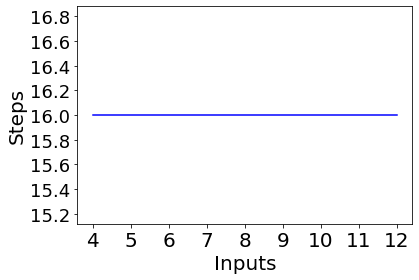

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = [4, 5, 6, 8, 10, 12]

y = [16, 16, 16, 16, 16, 16]

plt.plot(x, y, 'b')
plt.xlabel('Inputs', fontdict={'fontsize':20})
plt.ylabel('Steps', fontdict={'fontsize':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

**Example 2:**

In [9]:
def linear_algo(items):
    for item in items:
        print(item)
linear_algo([2, 4, 6, 8, 10, 12])


2
4
6
8
10
12


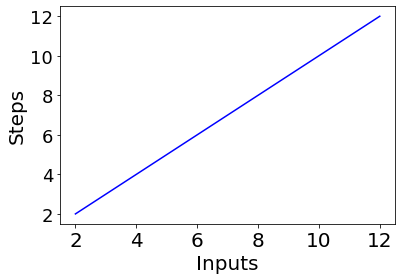

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = [2, 4, 6, 8, 10, 12]
y = [2, 4, 6, 8, 10, 12]
plt.plot(x, y, 'b')
plt.xlabel('Inputs', fontdict={'fontsize':20})
plt.ylabel('Steps', fontdict={'fontsize':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

**Example 3:**

In [8]:
def quadratic_algo(items):
    for item in items:
        for item2 in items:
            print(item, ' ' ,item)
quadratic_algo([4, 5, 6, 8])

4   4
4   4
4   4
4   4
5   5
5   5
5   5
5   5
6   6
6   6
6   6
6   6
8   8
8   8
8   8
8   8


In the script above:

1. We have an outer loop that iterates through all the items in the input list
2. Then a nested inner loop, which again iterates through all the items in the input list. 
3. The total number of steps performed is n * n, where n is the number of items in the input array.

**Quiz 1**

What is the time complexity of the function below?

Please write your answer here: https://PollEv.com/free_text_polls/NRTG1xKa1mac51cVZwnvV/respond

In [6]:
def complex_algo(items):

    for i in range(5):
        print ("Python is awesome")

    for item in items:
        print(item)

    for item in items:
        print(item)

    print("Big O")
    print("Big O")
    print("Big O")

complex_algo([4, 5, 6, 8])


Python is awesome
Python is awesome
Python is awesome
Python is awesome
Python is awesome
4
5
6
8
4
5
6
8
Big O
Big O
Big O


### Worst vs Best Case Complexity

* Usually, when someone asks you about the complexity of the algorithm s/he is asking you about the worst case complexity.

In [7]:
def search_algo(num, items):
    for item in items:
        if item == num:
            return True
        else:
            return False
nums = [2, 4, 6, 8, 10]

print(search_algo(2, nums))

True


**Question:** What are the *best* and *worst* case complexity for the function above?

### Space Complexity

* In addition to the time complexity, where you count the number of steps required to complete the execution of an algorithm, you can also find space complexity.
* It refers to the number of spaces you need to allocate in the memory space during the execution of a program.

In [25]:
def return_squares(n):
    square_list = []
    for num in n:
        square_list.append(num * num)

    return square_list

nums = [2, 4, 6, 8, 10]
print(return_squares(nums))

[4, 16, 36, 64, 100]


**Question:** What is the *space* complexity for the function above?

**Quiz 2**

Which of the following best describes the useful criterion for comparing the efficiency of algorithms?

1) Time

2) Memory

3) Both of the above 

4) None of the above

Please answer here: https://PollEv.com/multiple_choice_polls/LqsyeMwXQiRZ7z0Y9m8gx/respond

<center>
    
# 2. Recursion

The Factorial Function:

<center>
<img src="img/Qimage-4.JPG" width="700"/>

The factorial function is important because it is known to equal the number of ways in which n distinct items can be arranged
into a sequence (i.e. the number of **_permutations_** of *n* items).

Natural recursive definition for the factorial function:
<center>
<img src="img/Qimage-5.JPG" width="700"/>

In [16]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
    
factorial(4)

24

* This function does not use any explicit loops.
* Repetition is provided by the repeated recursive invocations of the function.
* We illustrate the execution of a recursive function using a **_recursion trace_**.

<center>
<img src="img/Qimage-6.JPG" width="600"/>

**Quiz 3**

What will be the output of the following Python code? And why?

1) 13

2) 7

3) Infinite loop

4) 17

Please answer here: https://PollEv.com/multiple_choice_polls/LZc7uh9deG66jzVtaK2Jt/respond

In [17]:
def test(i,j):
    if(i==0):
        return j
    else:
        return test(i-1,i+j)
print(test(4,7))

17


### Fibonacci Numbers

The Fibonacci series begins as: 0,1,1,2,3,5,8,13,....

### An Inefficient Recursion for Computing Fibonacci Numbers

The Fibonacci numbers can also be defined recursively as follows:

<center>
<img src="img/Qimage-10.JPG" width="600"/>

In [7]:
def bad_fibonacci(n):
    """Return the nth Fibonacci number."""
    if n <= 1:
        return n
    else:
        return bad_fibonacci(n-2) + bad_fibonacci(n-1)

* Terribly inefficient function.
* Computing the *n<sup>th</sup>* Fibonacci number in this way requires an exponential number of calls to the function.

<center>
<img src="img/Qimage-11.JPG" width="700"/>

* If we follow the pattern forward, we see that the number of calls more than doubles for each two consecutive indices.
* That is, *c<sub>4</sub>* is more than twice *c<sub>2</sub>*, *c<sub>5</sub>* is more than twice *c<sub>3</sub>*, *c<sub>6</sub>* is more than twice *c<sub>4</sub>*, and so on.
* Thus, *c<sub>n</sub>* > *2<sup>n/2</sup>*, which means that ``bad_fibonacci(n)`` makes a number of calls that is exponential in *n*.

### An Efficient Recursion for Computing Fibonacci Numbers

* We can compute Fn much more efficiently using a recursion in which each invocation makes only **one** recursive call.
* We need to redefine the expectations of the function.
* Rather than having the function return a single value, which is the *n<sup>th</sup>* Fibonacci number, we define a recursive function that returns a pair of consecutive Fibonacci numbers *(Fn,Fn−1)*.

In [21]:
def good_fibonacci(n):
    """Return pair of Fibonacci numbers, F(n) and F(n-1)."""
    if n <= 1:
        return (n,0)
    else:
        (a, b) = good_fibonacci(n-1)
        return (a+b, a)
good_fibonacci(3)

(2, 1)

* function good fibonacci(n) takes *O(n)* time.
* Each recursive call to good fibonacci decreases the argument n by 1.
* A recursion trace includes a series of *n* function calls.
* Because the nonrecursive work for each call uses constant time, the overall computation executes in *O(n)* time.

### Binary Search - A Classic Recursive Algorithm

* This algorithm is used to efficiently locate a target value within a sorted sequence of n elements.

<center>
<img src="img/Qimage-7.JPG" width="600"/>

* This is known as the **_sequential search_** algorithm.
* This algorithm runs in *O(n)* time

* The algorithm maintains two parameters, ``low`` and ``high``, such that all the candidate entries have index at least ``low`` and at most ``high``.
* Initially, ``low = 0`` and ``high = n−1``.
* We then compare the target value to the **_median_** candidate, that is, the item ``data[mid]``

<center>
<img src="img/Qimage-8.JPG" width="500"/>

1. If the ``target = data[mid]``, then we have found the item we are looking for, and the search **_terminates_** successfully.
2. If ``target < data[mid]``, then we recur on the first half of the sequence, that is, on the interval of indices from *low to mid−1*.
3. If ``target > data[mid]``, then we recur on the second half of the sequence, that is, on the interval of indices from *mid+1 to high*.

This algorithm is known as **_binary search_**.

In [ ]:
def binary_search(data, target, low, high):
    """Return True if target is found in indicated portion of a Python list.
    The search only considers the portion from data[low] to data[high] inclusive.
    """

    if low > high:
        return False # interval is empty; no match
    else:
        mid = (low + high) // 2
        if target == data[mid]: # found a match
            return True
        elif target < data[mid]:
            # recur on the portion left of the middle
            return binary_search(data, target, low, mid - 1)
        else:
            # recur on the portion right of the middle
            return binary_search(data, target, mid + 1, high)
        

* **_Binary Search_** runs in *O(logn)* time.
* This is a significant improvement, compared to sequential search (*O(n)*)

<center>
<img src="img/Qimage-9.JPG" width="900"/>

<center>
    
# 3. Exercices

**Ex1.**

Draw the recursion trace for the computation of power(2,5), code below:

In [17]:
def power(x, n):
    """Compute the value x n for integer n."""
    if n == 0:
        return 1
    else:
        return x * power(x, n-1)

**Ex2.**

Write a short recursive Python function that takes a character string *s* and outputs its reverse. For example, the reverse of ``pots&pans`` would be ``snap&stop``.

**Ex3.**

Give a recursive algorithm to compute the product of two positive integers, m and n, using only addition and subtraction.